In [11]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import healpy as hp
from tqdm import tqdm
sys.path.append('../')
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2
from dance.simulations import CMB, Noise, Sky
from dance.qe import Reconstruct
from dance.delens import Delens
from dance.utils import bin_cmb_spectrum
from dance.spectra import Likelihood

MPI startup(): FI_PSM3_UUID was not generated, please set it to avoid possible resources ownership conflicts between MPI processes


In [3]:
basedir = '/mnt/sdceph/users/alonappan/DANCE_debug'

In [4]:
#qe.plot_qcl(0)

In [28]:
dd = Delens(basedir,2048,6,beta=0.35,lmin_ivf=2,lmax_ivf=4096,lmax_qlm=4096)

CMB : INFO - Isotropic(constant) cosmic birefringence model selected
INFO:CMB:Isotropic(constant) cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
INFO:CMB:Loading CMB power spectra from file
CMB : INFO - Isotropic(constant) cosmic birefringence model selected
INFO:CMB:Isotropic(constant) cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
INFO:CMB:Loading CMB power spectra from file


/mnt/home/alonappan/anaconda3/cstm_pkgs/plancklens/plancklens/utils.py:124: RuntimeWarning: overflow encountered in cast
  return hashlib.sha1(np.copy(cl.astype(dtype), order='C')).hexdigest()
CMB : INFO - Isotropic(constant) cosmic birefringence model selected
INFO:CMB:Isotropic(constant) cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
INFO:CMB:Loading CMB power spectra from file
CMB : INFO - Isotropic(constant) cosmic birefringence model selected
INFO:CMB:Isotropic(constant) cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
INFO:CMB:Loading CMB power spectra from file


In [67]:
data = dd.get_data(debias=False)

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:02<00:00, 36.92it/s]


In [59]:
data.keys()

dict_keys(['b', 'lens', 'delens', 'delens_theory', 'bias'])

In [68]:
#bias = data['bias']
lens_b = data['b']
lens_c_array = data['lens']
#delens_theory_b = data['delens_theory']
delens_c_array_biased = data['delens']

In [69]:
lens_dl = lens_b * (lens_b + 1) / (2 * np.pi)

In [70]:
eb_signal =dd.recon.wf.cmb.get_cb_lensed_spectra(0.35,dl=False)['eb']
leb = np.arange(len(eb_signal))
dleb = leb * (leb+1) / (2 * np.pi)

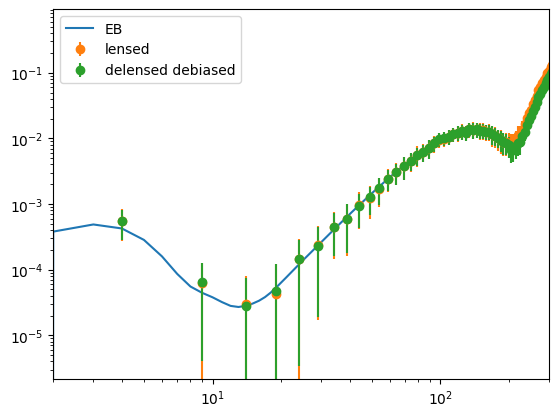

In [71]:
plt.loglog(dleb*eb_signal,label='EB')
plt.errorbar(lens_b,lens_c_array.mean(axis=0)*lens_dl,yerr=lens_c_array.std(axis=0)*lens_dl,fmt='o',label='lensed')
#plt.errorbar(lens_b,(delens_c_array_biased.mean(axis=0)+bias)*lens_dl,yerr=delens_c_array_biased.std(axis=0)*lens_dl,fmt='o',label='delensed debiased')
plt.errorbar(lens_b,delens_c_array_biased.mean(axis=0)*lens_dl,yerr=delens_c_array_biased.std(axis=0)*lens_dl,fmt='o',label='delensed debiased')
plt.xlim(2,300)
plt.legend()

In [29]:
lh = Likelihood(dd,lmax=1000,debias=True)

Removed no burn in
Removed no burn in
Removed no burn in


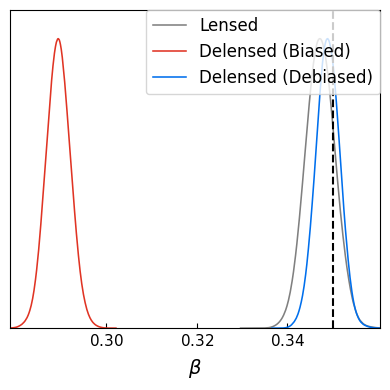

In [30]:
ls = lh.plot_compare()

In [31]:
lh.get_limits()

Removed no burn in
Lensed: \beta = 0.3473\pm 0.0033
Removed no burn in
Delensed (Biased): \beta = 0.2894\pm 0.0027
Removed no burn in
Delensed (Debiased): \beta = 0.3489\pm 0.0026


In [32]:
1 - 0.027/0.033

0.18181818181818188